In [11]:
import pandas as pd
from sklearn import linear_model

In [12]:
df = pd.read_csv('facebook_train.csv')

In [13]:
df.head()

,total_followers,type,category,month,weekday,hour,paid,comment,like,share
0,124050,Photo,3,6,4,17,1,3,77,16
1,132556,Photo,2,8,3,24,0,11,313,50
2,92786,Photo,2,2,6,17,1,2,145,39
3,135632,Photo,1,9,2,1,0,2,299,49
4,139540,Link,1,12,3,17,1,7,229,21


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 10 columns):
total_followers    397 non-null int64
type               397 non-null object
category           397 non-null int64
month              397 non-null int64
weekday            397 non-null int64
hour               397 non-null int64
paid               397 non-null int64
comment            397 non-null int64
like               397 non-null int64
share              397 non-null int64
dtypes: int64(9), object(1)
memory usage: 31.1+ KB


In [15]:
#getting dummies for the categorical value type

t = pd.get_dummies(df['type'], drop_first=True)
df.drop(['type'], axis=1, inplace=True)
df = pd.concat([df, type], axis=1)
df.head()

,total_followers,category,month,weekday,hour,paid,comment,like,share,Photo,Status,Video
0,124050,3,6,4,17,1,3,77,16,1,0,0
1,132556,2,8,3,24,0,11,313,50,1,0,0
2,92786,2,2,6,17,1,2,145,39,1,0,0
3,135632,1,9,2,1,0,2,299,49,1,0,0
4,139540,1,12,3,17,1,7,229,21,0,0,0


In [16]:
#defining the Xs and the target and randomly splitting into training and test
#I chose likes as my target

from sklearn.model_selection import train_test_split

X = df[['total_followers', 'category', 'month', 'weekday', 'hour', 'paid', 'Photo', 'Status', 'Video']]
Y = df['like']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=0)

In [17]:
#building a linear model

lm = linear_model.LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
#checking the intercept

print(lm.intercept_)

-691.8257032210822


In [19]:
#checking the coefficients, this shows us how much a single variable influences the target

coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
total_followers,0.006451
category,34.712966
month,-25.379455
weekday,18.437891
hour,3.788340
paid,113.576285
Photo,88.553074
Status,33.396075
Video,71.020611


In [20]:
#predicting for the test split

predictions = lm.predict(X_test)

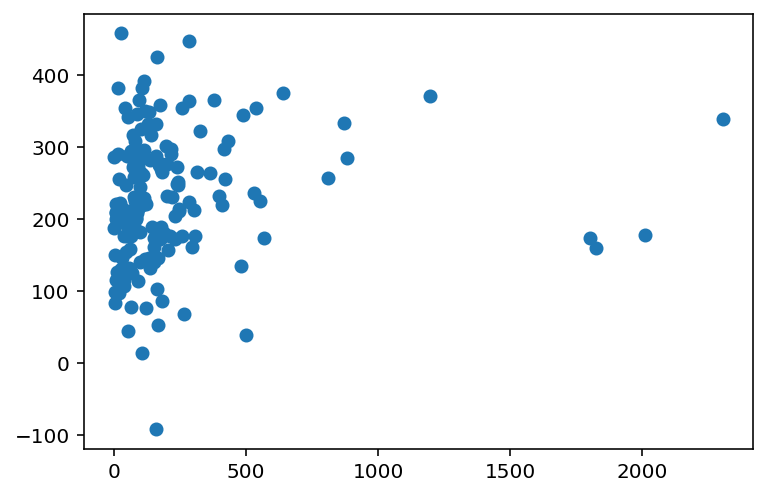

In [25]:
#graphing the predictions and the actual values

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.scatter(Y_test, predictions)

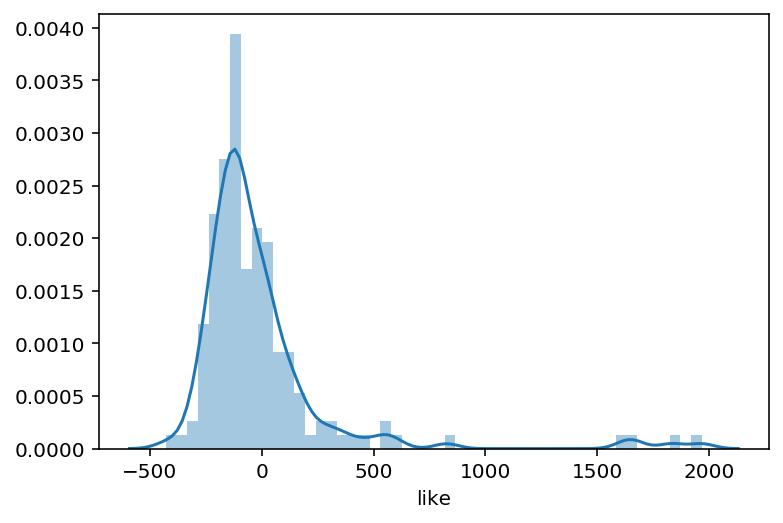

In [23]:
#graphing the difference between the prediction and the actual values

sns.distplot((Y_test-predictions), bins=50)

In [27]:
#checking the error metrics

from sklearn import metrics
import numpy as np

print('MAE: ', metrics.mean_absolute_error(Y_test, predictions))
print('MSE: ', metrics.mean_squared_error(Y_test, predictions))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

MAE:  189.74482821981485
MSE:  115673.03852014778
RMSE:  340.1073926278989


In [37]:
#sample prediction for a single datapoint

k = [[500000, 3, 1, 3, 20, 1, 1, 0, 0]]
lm.predict(k)

array([2945.56327829])

In [64]:
#Second Model
car_data = pd.read_csv('casualty_train.csv')

In [65]:
car_data.head()

,casualty_class,gender,age,severe,pedestrian_location,pedestrian_movement,travel,year
0,passenger,female,33,False,NaN,NaN,motorbike,2007
1,passenger,female,20,False,NaN,NaN,car,2005
2,passenger,male,52,False,NaN,NaN,car,2006
3,passenger,female,17,False,NaN,NaN,pedestrian,2012
4,passenger,female,20,False,NaN,NaN,motorbike,2010


In [66]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232835 entries, 0 to 232834
Data columns (total 8 columns):
casualty_class         232835 non-null object
gender                 232835 non-null object
age                    232835 non-null object
severe                 232835 non-null bool
pedestrian_location    43259 non-null object
pedestrian_movement    43259 non-null object
travel                 232835 non-null object
year                   232835 non-null int64
dtypes: bool(1), int64(1), object(6)
memory usage: 12.7+ MB


In [67]:
#I replace a lot of the values with the dummies

casualty_class = pd.get_dummies(car_data['casualty_class'], drop_first=True)
gender = pd.get_dummies(car_data['gender'], drop_first=True)
severe = pd.get_dummies(car_data['severe'], drop_first=True)
pedestrian_location = pd.get_dummies(car_data['pedestrian_location'], drop_first=True)
pedestrian_movement = pd.get_dummies(car_data['pedestrian_movement'], drop_first=True)
travel = pd.get_dummies(car_data['travel'], drop_first=True)


car_data.drop(['casualty_class', 'gender', 'severe', 'pedestrian_location', 'pedestrian_movement', 'travel'], axis=1, inplace=True)

car_data = pd.concat([car_data, casualty_class, gender, severe, pedestrian_location, pedestrian_movement, travel], axis=1, names=['Series name', 'Row ID'])

car_data.head()

,age,year,passenger,pedestrian,male,True,Footpath,In road,Not on Crossing,Pedestrian Crossing,...,Facing Traffic,In Rd Not Crossing,In Rd Not Crossing Msk,Unknown Or Other,bus,car,motorbike,other,pedestrian,taxi
0,33,2007,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,20,2005,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,52,2006,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,17,2012,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,20,2010,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [68]:
#For some reason I cannot replace the name of the True column with severe

car_data.rename(columns={'True':'severe'}, inplace=True)
car_data.info()
car_data.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232835 entries, 0 to 232834
Data columns (total 26 columns):
age                       232835 non-null object
year                      232835 non-null int64
passenger                 232835 non-null uint8
pedestrian                232835 non-null uint8
male                      232835 non-null uint8
True                      232835 non-null uint8
Footpath                  232835 non-null uint8
In road                   232835 non-null uint8
Not on Crossing           232835 non-null uint8
Pedestrian Crossing       232835 non-null uint8
Unknown                   232835 non-null uint8
Zig-Zag                   232835 non-null uint8
Drivers N/Side            232835 non-null uint8
Drivers N/Side Msk        232835 non-null uint8
Drivers O/Side            232835 non-null uint8
Drivers O/Side Msk        232835 non-null uint8
Facing Traffic            232835 non-null uint8
In Rd Not Crossing        232835 non-null uint8
In Rd Not Crossing Msk  

,age,year,passenger,pedestrian,male,True,Footpath,In road,Not on Crossing,Pedestrian Crossing,...,Facing Traffic,In Rd Not Crossing,In Rd Not Crossing Msk,Unknown Or Other,bus,car,motorbike,other,pedestrian,taxi
0,33,2007,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,20,2005,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,52,2006,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [45]:
#I try to split the data, but the column labeled as True gets things confusing.
#I think the program cannot tell it is a column name

X_train, X_test, Y_train, Y_test = train_test_split(car_data.drop('True', axis=1), car_data['True'], test_size=0.30, random_state=101)

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

KeyError: "['True'] not found in axis"